<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#COMP30024-Artificial-Intelligence-Project-1-Report" data-toc-modified-id="COMP30024-Artificial-Intelligence-Project-1-Report-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>COMP30024 Artificial Intelligence Project 1 Report</a></span><ul class="toc-item"><li><span><a href="#import" data-toc-modified-id="import-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>import</a></span></li><li><span><a href="#new-analysis" data-toc-modified-id="new-analysis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>new analysis</a></span><ul class="toc-item"><li><span><a href="#generate-all-test-case" data-toc-modified-id="generate-all-test-case-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>generate all test case</a></span></li><li><span><a href="#store-output" data-toc-modified-id="store-output-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>store output</a></span></li><li><span><a href="#draw-graph" data-toc-modified-id="draw-graph-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>draw graph</a></span></li></ul></li></ul></li></ul></div>

# COMP30024 Artificial Intelligence Project 1 Report

## import

In [25]:
import pandas as pd
import numpy as np
import glob
import os
import timeit
from subprocess import call
import subprocess
import json
import matplotlib.pyplot as plt
from math import log

## new analysis

In [2]:
# root = 'C:\\Users\\53421\\PycharmProjects\\ai-project\\project1'
# root = "e://backup/code/python/ai-project/project1"
# os.chdir(root)

### generate all test case

### store output

DataFrame: #piece, #block, avg b, d, relative error, runtime, space

time python data.py

In [53]:
summary = pd.read_csv("out.csv", sep=',', index_col=False)
summary_clean = summary.drop(summary.columns[0], axis=1)

In [54]:
summary_clean[summary_clean["runtime(in ms)"] >= 30 * 1000]

# summary.sample(10)

,number of pieces,number of blocks,average branching factor,depth of search tree,relative error,runtime(in ms),space used(in MB),preprocess time(in ms),file name


In [4]:
summary.head(10)

,Unnamed: 0,number of pieces,number of blocks,average branching factor,depth of search tree,relative error,runtime(in ms),space used(in MB),preprocess time(in ms),file name
0,0,1.0,0.0,2.000000,3.0,1.0,1239.3570,8053.0,79.2099,./fullTestCase/1p/0b0.json
1,1,1.0,0.0,1.375000,6.0,2.0,125.8008,8053.0,76.2097,./fullTestCase/1p/0b1.json
2,2,1.0,0.0,2.250000,3.0,1.0,114.4489,8053.0,72.7617,./fullTestCase/1p/0b2.json
3,3,1.0,0.0,1.818182,4.0,1.0,116.3806,8053.0,71.4398,./fullTestCase/1p/0b3.json
4,4,1.0,0.0,2.250000,3.0,1.0,122.1774,8053.0,70.4511,./fullTestCase/1p/0b4.json
5,5,1.0,0.0,1.193548,7.0,3.0,124.8771,8053.0,76.6885,./fullTestCase/1p/0b5.json
6,6,1.0,0.0,1.384615,7.0,3.0,123.1861,8053.0,71.4157,./fullTestCase/1p/0b6.json
7,7,1.0,0.0,1.478261,6.0,2.0,123.4972,8053.0,71.1706,./fullTestCase/1p/0b7.json
8,8,1.0,0.0,1.909091,4.0,1.0,161.8360,8053.0,69.2864,./fullTestCase/1p/0b8.json
9,9,1.0,0.0,1.000000,1.0,0.0,115.0277,8053.0,71.9303,./fullTestCase/1p/0b9.json


In [5]:
summary.tail(10)

,Unnamed: 0,number of pieces,number of blocks,average branching factor,depth of search tree,relative error,runtime(in ms),space used(in MB),preprocess time(in ms),file name
3062,3062,4.0,29.0,1.695652,11.0,0.0,116.4473,8053.0,68.7609,./fullTestCase/4p/29b10.json
3063,3063,4.0,29.0,2.342105,15.0,0.0,134.5989,8053.0,68.6588,./fullTestCase/4p/29b15.json
3064,3064,4.0,29.0,2.656250,12.0,0.0,126.6297,8053.0,69.0329,./fullTestCase/4p/29b16.json
3065,3065,4.0,30.0,1.666667,14.0,1.0,133.4542,8053.0,69.5785,./fullTestCase/4p/30b9.json
3066,3066,4.0,30.0,1.300000,10.0,0.0,117.2791,8053.0,67.8171,./fullTestCase/4p/30b18.json
3067,3067,4.0,30.0,1.333333,12.0,0.0,125.6170,8053.0,83.9247,./fullTestCase/4p/30b25.json
3068,3068,4.0,31.0,1.500000,10.0,0.0,118.0701,8053.0,69.0512,./fullTestCase/4p/31b1.json
3069,3069,4.0,31.0,1.666667,14.0,1.0,128.2372,8053.0,75.8319,./fullTestCase/4p/31b10.json
3070,3070,4.0,31.0,1.222222,6.0,0.0,121.2267,8053.0,69.2554,./fullTestCase/4p/31b28.json
3071,3071,4.0,31.0,1.391304,11.0,0.0,130.4657,8053.0,73.9272,./fullTestCase/4p/31b29.json


### draw graph

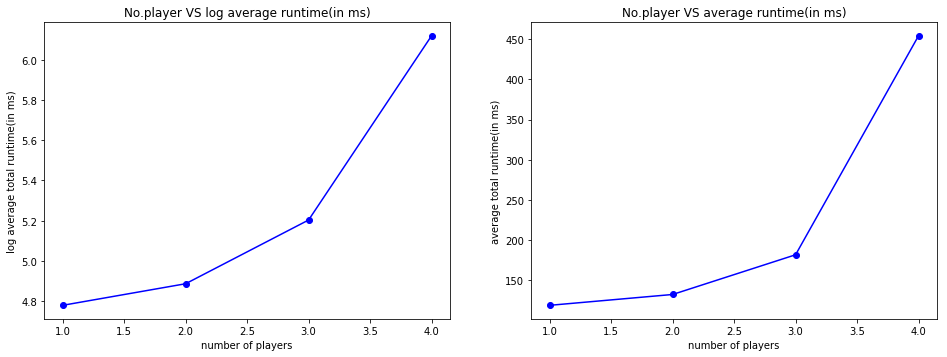

In [64]:
grouped = summary.groupby('number of pieces')
p_runtime = []
p_preprocess_time = []
p_execution_time = []
players = []
for i, group in grouped:
    players.append(i)
    p_runtime.append(group['runtime(in ms)'].mean())
    p_preprocess_time.append(group['preprocess time(in ms)'].mean())
    p_execution_time.append(p_runtime[len(p_runtime) - 1] - p_preprocess_time[len(p_preprocess_time) - 1])

log_p_runtime = list(map(log, p_runtime))

plt.figure(figsize = [16, 12])

plt.subplot(2, 2, 1)
plt.plot(players, log_p_runtime, "bo-")
plt.title("No.player VS log average runtime(in ms)")
plt.xlabel("number of players")
plt.ylabel("log average total runtime(in ms)")

plt.subplot(2, 2, 2)
plt.plot(players, p_runtime, "bo-")
plt.title("No.player VS average runtime(in ms)")
plt.xlabel("number of players")
plt.ylabel("average total runtime(in ms)")

plt.show()

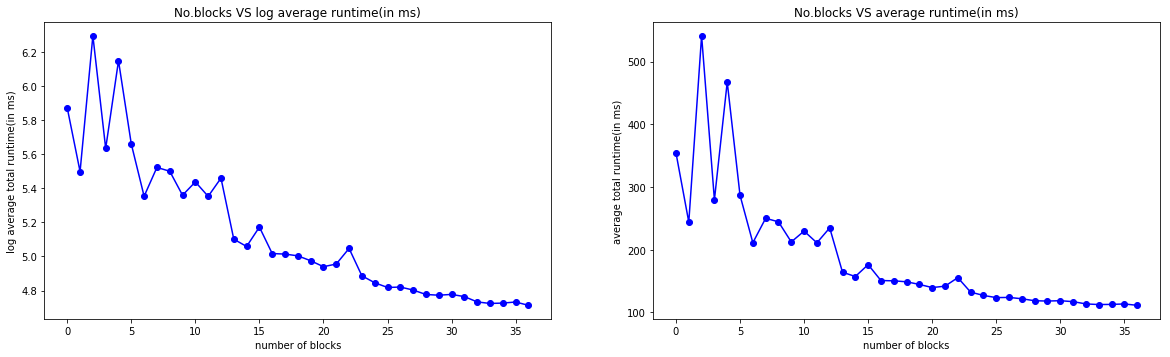

In [63]:
grouped = summary.groupby('number of blocks')
b_runtime = []
b_preprocess_time = []
b_execution_time = []
blocks = []
for i, group in grouped:
    blocks.append(i)
    b_runtime.append(group['runtime(in ms)'].mean())
    b_preprocess_time.append(group['preprocess time(in ms)'].mean())
    b_execution_time.append(b_runtime[len(b_runtime) - 1] - b_preprocess_time[len(b_preprocess_time) - 1])


log_b_runtime = list(map(log, b_runtime))

plt.figure(figsize = [20, 12])

plt.subplot(2, 2, 1)
# plt.plot(blocks, b_runtime, "bo-")
plt.plot(blocks, log_b_runtime, "bo-")
plt.title("No.blocks VS log average runtime(in ms)")
plt.xlabel("number of blocks")
plt.ylabel("log average total runtime(in ms)")

plt.subplot(2, 2, 2)
plt.plot(blocks, b_runtime, "bo-")
plt.title("No.blocks VS average runtime(in ms)")
plt.xlabel("number of blocks")
plt.ylabel("average total runtime(in ms)")

plt.show()

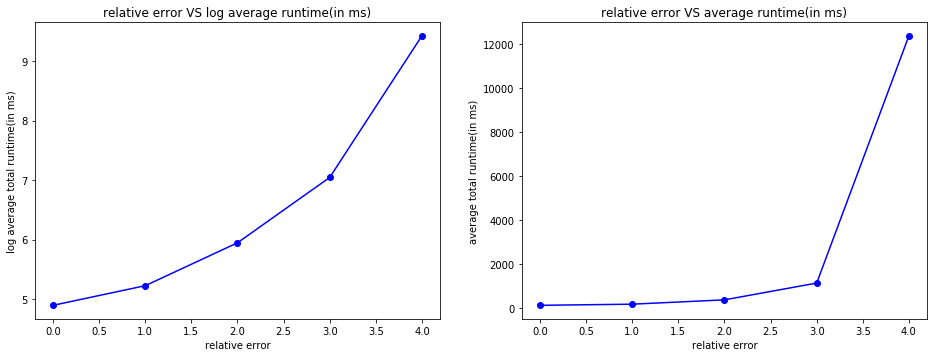

In [67]:
grouped = summary.groupby('relative error')
r_runtime = []
r_preprocess_time = []
r_execution_time = []
error = []
for i, group in grouped:
    error.append(i)
    r_runtime.append(group['runtime(in ms)'].mean())
    r_preprocess_time.append(group['preprocess time(in ms)'].mean())
    r_execution_time.append(r_runtime[len(r_runtime) - 1] - r_preprocess_time[len(r_preprocess_time) - 1])

log_r_runtime = list(map(log, r_runtime))
    
plt.figure(figsize = [16, 12])

plt.subplot(2, 2, 1)
plt.plot(error, log_r_runtime, "bo-")
plt.title("relative error VS log average runtime(in ms)")
plt.xlabel("relative error")
plt.ylabel("log average total runtime(in ms)")

plt.subplot(2, 2, 2)
plt.plot(error, r_runtime, "bo-")
plt.title("relative error VS average runtime(in ms)")
plt.xlabel("relative error")
plt.ylabel("average total runtime(in ms)")

plt.show()

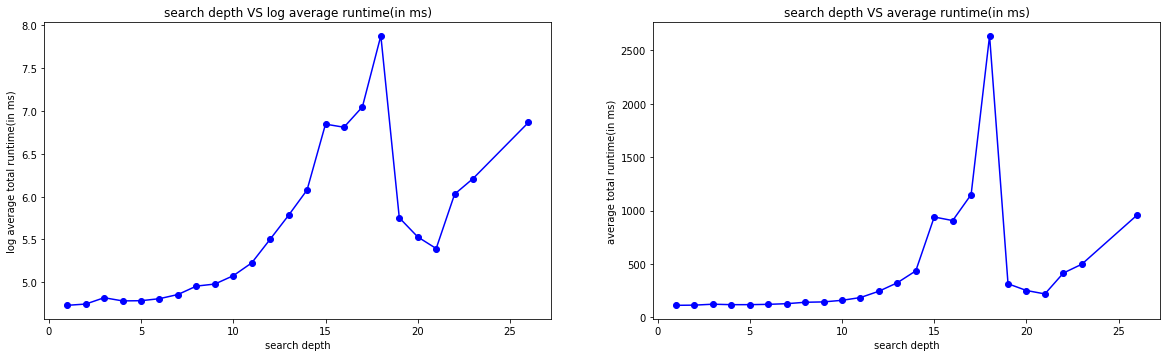

In [68]:
grouped = summary.groupby('depth of search tree')
d_runtime = []
d_preprocess_time = []
d_execution_time = []
depth = []
for i, group in grouped:
    depth.append(i)
    d_runtime.append(group['runtime(in ms)'].mean())
    d_preprocess_time.append(group['preprocess time(in ms)'].mean())
    d_execution_time.append(d_runtime[len(d_runtime) - 1] - d_preprocess_time[len(d_preprocess_time) - 1])

log_d_runtime = list(map(log, d_runtime))
    
plt.figure(figsize = [20, 12])

plt.subplot(2, 2, 1)
plt.plot(depth, log_d_runtime, "bo-")
plt.title("search depth VS log average runtime(in ms)")
plt.xlabel("search depth")
plt.ylabel("log average total runtime(in ms)")

plt.subplot(2, 2, 2)
plt.plot(depth, d_runtime, "bo-")
plt.title("search depth VS average runtime(in ms)")
plt.xlabel("search depth")
plt.ylabel("average total runtime(in ms)")

plt.show()

In [16]:
summary[summary['depth of search tree'] == 18]

,Unnamed: 0,number of pieces,number of blocks,average branching factor,depth of search tree,relative error,runtime(in ms),space used(in MB),preprocess time(in ms),file name
2418,2418,4.0,2.0,4.429582,18.0,4.0,24398.9280,8053.0,71.9128,./fullTestCase/4p/2b27.json
2465,2465,4.0,4.0,5.600629,18.0,3.0,8387.3697,8053.0,72.6191,./fullTestCase/4p/4b14.json
2678,2678,4.0,11.0,4.500907,18.0,2.0,867.6792,8053.0,69.2280,./fullTestCase/4p/11b18.json
2686,2686,4.0,11.0,5.997297,18.0,2.0,2592.6346,8053.0,72.3865,./fullTestCase/4p/11b26.json
2687,2687,4.0,11.0,5.644000,18.0,2.0,790.8641,8053.0,74.8363,./fullTestCase/4p/11b27.json
2713,2713,4.0,12.0,2.517142,18.0,1.0,4410.7332,8053.0,71.4441,./fullTestCase/4p/12b23.json
2734,2734,4.0,13.0,6.392256,18.0,1.0,747.2168,8053.0,73.0534,./fullTestCase/4p/13b14.json
2820,2820,4.0,16.0,7.132013,18.0,0.0,351.6267,8053.0,71.0601,./fullTestCase/4p/16b13.json
2862,2862,4.0,17.0,6.652941,18.0,0.0,274.8623,8053.0,71.8249,./fullTestCase/4p/17b27.json
2864,2864,4.0,17.0,5.845304,18.0,1.0,250.2250,8053.0,71.6203,./fullTestCase/4p/17b29.json


In [55]:
### draw branching factor VS runtime
# method 1: ceil all branching factors and groupby as usual
from copy import deepcopy
from math import ceil

temp = deepcopy(summary)
temp['average branching factor'] = temp['average branching factor'].apply(lambda x: ceil(x))
temp.head(10)

,Unnamed: 0,number of pieces,number of blocks,average branching factor,depth of search tree,relative error,runtime(in ms),space used(in MB),preprocess time(in ms),file name
0,0,1.0,0.0,2,3.0,1.0,1239.3570,8053.0,79.2099,./fullTestCase/1p/0b0.json
1,1,1.0,0.0,2,6.0,2.0,125.8008,8053.0,76.2097,./fullTestCase/1p/0b1.json
2,2,1.0,0.0,3,3.0,1.0,114.4489,8053.0,72.7617,./fullTestCase/1p/0b2.json
3,3,1.0,0.0,2,4.0,1.0,116.3806,8053.0,71.4398,./fullTestCase/1p/0b3.json
4,4,1.0,0.0,3,3.0,1.0,122.1774,8053.0,70.4511,./fullTestCase/1p/0b4.json
5,5,1.0,0.0,2,7.0,3.0,124.8771,8053.0,76.6885,./fullTestCase/1p/0b5.json
6,6,1.0,0.0,2,7.0,3.0,123.1861,8053.0,71.4157,./fullTestCase/1p/0b6.json
7,7,1.0,0.0,2,6.0,2.0,123.4972,8053.0,71.1706,./fullTestCase/1p/0b7.json
8,8,1.0,0.0,2,4.0,1.0,161.8360,8053.0,69.2864,./fullTestCase/1p/0b8.json
9,9,1.0,0.0,1,1.0,0.0,115.0277,8053.0,71.9303,./fullTestCase/1p/0b9.json


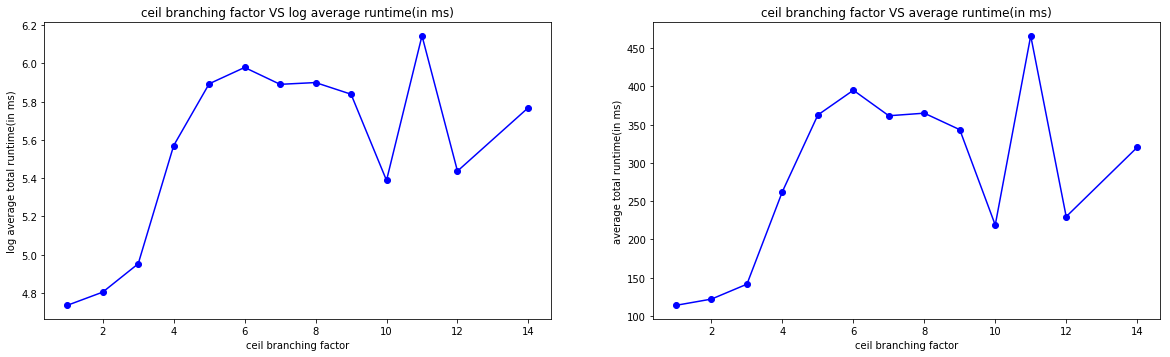

In [71]:
grouped = temp.groupby('average branching factor')
f_runtime = []
branching_factor = []
for i, group in grouped:
    branching_factor.append(i)
    f_runtime.append(group['runtime(in ms)'].mean())

log_f_runtime = list(map(log, f_runtime))
    
plt.figure(figsize = [20, 12])

plt.subplot(2, 2, 1)
plt.plot(branching_factor, log_f_runtime, "bo-")
plt.title("ceil branching factor VS log average runtime(in ms)")
plt.xlabel("ceil branching factor")
plt.ylabel("log average total runtime(in ms)")

plt.subplot(2, 2, 2)
plt.plot(branching_factor, f_runtime, "bo-")
plt.title("ceil branching factor VS average runtime(in ms)")
plt.xlabel("ceil branching factor")
plt.ylabel("average total runtime(in ms)")

plt.show()

In [58]:
# method 2: bins branching factors
temp2 = deepcopy(summary)
temp2.head(10)

,Unnamed: 0,number of pieces,number of blocks,average branching factor,depth of search tree,relative error,runtime(in ms),space used(in MB),preprocess time(in ms),file name
0,0,1.0,0.0,2.000000,3.0,1.0,1239.3570,8053.0,79.2099,./fullTestCase/1p/0b0.json
1,1,1.0,0.0,1.375000,6.0,2.0,125.8008,8053.0,76.2097,./fullTestCase/1p/0b1.json
2,2,1.0,0.0,2.250000,3.0,1.0,114.4489,8053.0,72.7617,./fullTestCase/1p/0b2.json
3,3,1.0,0.0,1.818182,4.0,1.0,116.3806,8053.0,71.4398,./fullTestCase/1p/0b3.json
4,4,1.0,0.0,2.250000,3.0,1.0,122.1774,8053.0,70.4511,./fullTestCase/1p/0b4.json
5,5,1.0,0.0,1.193548,7.0,3.0,124.8771,8053.0,76.6885,./fullTestCase/1p/0b5.json
6,6,1.0,0.0,1.384615,7.0,3.0,123.1861,8053.0,71.4157,./fullTestCase/1p/0b6.json
7,7,1.0,0.0,1.478261,6.0,2.0,123.4972,8053.0,71.1706,./fullTestCase/1p/0b7.json
8,8,1.0,0.0,1.909091,4.0,1.0,161.8360,8053.0,69.2864,./fullTestCase/1p/0b8.json
9,9,1.0,0.0,1.000000,1.0,0.0,115.0277,8053.0,71.9303,./fullTestCase/1p/0b9.json
